In [0]:
!pip3 install torch torchvision

### Making Predictions (Aula 13)

In [0]:
import torch

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x + b
  return y

In [0]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

### Linear Class (Aula 14)

In [0]:
import torch
from torch.nn import Linear

In [0]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [0]:
x = torch.tensor([[2.0],[3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


### Custom Modules (Aula 15)

In [0]:
import torch
import torch.nn as nn

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    pred = self.linear(x)
    return pred    

In [0]:
torch.manual_seed(1)
model = LR(1, 1)

In [0]:
x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


### Creating Dataset (Aula 16)

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

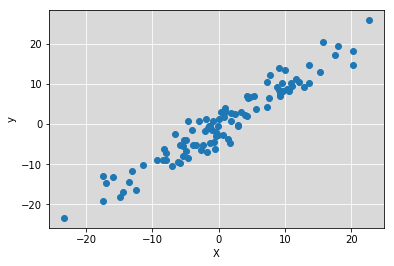

In [3]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.grid()
plt.ylabel('y')
plt.xlabel('X')

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)


In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  
  def forward(self, x):
    pred = self.linear(x)
    return pred  

In [5]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [6]:
[w, b] = model.parameters()
print(w, b)
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

def get_params():
  [w, b] = model.parameters()
  return (w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  
  ax = plt.gca()
  ax.set_facecolor((0.85, 0.85, 0.85))
  plt.grid(color='w', linestyle='solid')
  ax.set_axisbelow(True)
  
  plt.show()

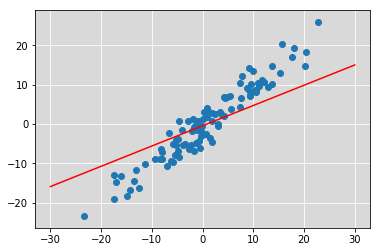

In [8]:
plot_fit('Initial Model')

### Training - Code Implementation (Aula 20)

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [10]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  [w, b] = get_params()
  print("Epoch:", i, "Loss:", loss.item(), "Weight:", w, "Bias:", b)
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 26.163183212280273 Weight: 0.5152631998062134 Bias: -0.44137823581695557
Epoch: 1 Loss: 16.74329376220703 Weight: 1.3254867792129517 Bias: -0.43195104598999023
Epoch: 2 Loss: 11.953834533691406 Weight: 0.7477484941482544 Bias: -0.4379076361656189
Epoch: 3 Loss: 9.518674850463867 Weight: 1.1596964597702026 Bias: -0.4329099655151367
Epoch: 4 Loss: 8.280532836914062 Weight: 0.8659487366676331 Bias: -0.43573808670043945
Epoch: 5 Loss: 7.651002883911133 Weight: 1.0753976106643677 Bias: -0.4330005943775177
Epoch: 6 Loss: 7.330916404724121 Weight: 0.9260422587394714 Bias: -0.43424591422080994
Epoch: 7 Loss: 7.168164253234863 Weight: 1.0325324535369873 Bias: -0.43266528844833374
Epoch: 8 Loss: 7.08540678024292 Weight: 0.9565920829772949 Bias: -0.4331134259700775
Epoch: 9 Loss: 7.043322563171387 Weight: 1.010733962059021 Bias: -0.432128369808197
Epoch: 10 Loss: 7.021918773651123 Weight: 0.9721208810806274 Bias: -0.43217840790748596
Epoch: 11 Loss: 7.0110297203063965 Weight: 0.999

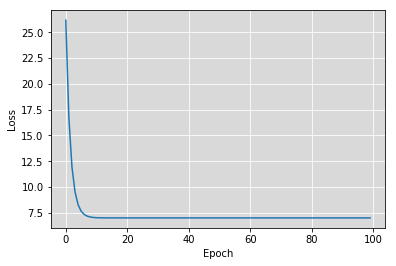

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

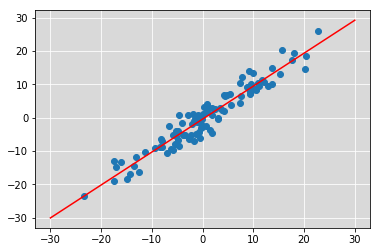

In [12]:
plot_fit('Trained Model')